<a href="https://colab.research.google.com/github/UppuSushma/NLP-Lab/blob/main/NLP_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries if required (not necessary in most cases)
# !pip install tensorflow numpy

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb

# Load dataset (you can change this to any other text dataset as required)
max_features = 10000  # Number of words to consider
maxlen = 100  # Cut texts after this number of words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Padding sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the GRU Model
def build_gru_model(input_shape, output_dim):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=64, input_length=input_shape))
    model.add(GRU(128, return_sequences=False))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru_model(input_shape=maxlen, output_dim=2)
gru_model.summary()

# Train the GRU model
gru_history = gru_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 346ms/step - accuracy: 0.6790 - loss: 0.5621 - val_accuracy: 0.8376 - val_loss: 0.3829
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 120s 290ms/step - accuracy: 0.8887 - loss: 0.2743 - val_accuracy: 0.8552 - val_loss: 0.3378
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 294ms/step - accuracy: 0.9322 - loss: 0.1852 - val_accuracy: 0.8496 - val_loss: 0.3713
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 162s 345ms/step - accuracy: 0.9611 - loss: 0.1172 - val_accuracy: 0.8442 - val_loss: 0.4483
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 345ms/step - accuracy: 0.9759 - loss: 0.0733 - val_accuracy: 0.8428 - val_loss: 0.5461


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 319ms/step - accuracy: 0.7334 - loss: 0.5154 - val_accuracy: 0.8536 - val_loss: 0.3379
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 285ms/step - accuracy: 0.8973 - loss: 0.2600 - val_accuracy: 0.8408 - val_loss: 0.3671
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 281ms/step - accuracy: 0.9328 - loss: 0.1844 - val_accuracy: 0.8398 - val_loss: 0.3866
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 292ms/step - accuracy: 0.9477 - loss: 0.1394 - val_accuracy: 0.8374 - val_loss: 0.4452
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 111s 284ms/step - accuracy: 0.9659 - loss: 0.0948 - val_accuracy: 0.8281 - val_loss: 0.5502
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8417 - loss: 0.5591
GRU Model Accuracy: 84.28%
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8278 - loss: 0.5580
LSTM Model Accuracy: 82.81%


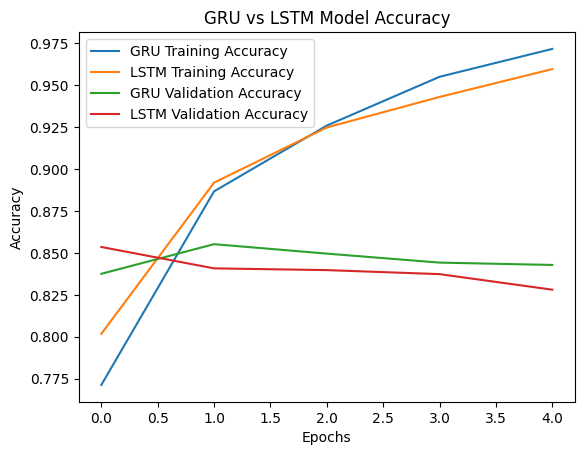

In [2]:
# Build the LSTM Model for comparison
def build_lstm_model(input_shape, output_dim):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=64, input_length=input_shape))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model(input_shape=maxlen, output_dim=2)
lstm_model.summary()

# Train the LSTM model
lstm_history = lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f"GRU Model Accuracy: {gru_accuracy*100:.2f}%")

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy*100:.2f}%")

# Plot accuracy comparison
import matplotlib.pyplot as plt

plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('GRU vs LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
